In [ ]:
!git clone https://github.com/pbloem/kgbench-loader.git
%cd kgbench-loader
!pip install .


Cloning into 'kgbench-loader'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 138 (delta 79), reused 91 (delta 39), pack-reused 0 (from 0)
Receiving objects: 100% (138/138), 45.12 KiB | 1.07 MiB/s, done.
Resolving deltas: 100% (79/79), done.
/content/kgbench-loader
Processing /content/kgbench-loader
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 565.1/565.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta

In [ ]:
from kgbench import load
dataset = load('dmg777k',torch=True)


loaded data dmg777k (64.19s).


In [ ]:
print(f"Dataset type: {type(dataset)}")
print(f"Available attributes: {dir(dataset)}")


Dataset type: <class 'kgbench.load.Data'>
Available attributes: ['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_datatypes', '_dt_g2l', '_dt_l2g', 'datatype_g2l', 'datatype_l2g', 'datatypes', 'dgl', 'e2i', 'final', 'get_images', 'get_images_batch', 'get_strings', 'get_strings_batch', 'i2e', 'i2r', 'name', 'num_classes', 'num_entities', 'num_relations', 'pyg', 'r2i', 'torch', 'training', 'triples', 'withheld']


In [ ]:
# Import necessary libraries
import kgbench
import torch
import networkx as nx
import matplotlib.pyplot as plt
from PIL import Image

# Load dataset (Change 'dmg777k' to your dataset if needed)


# Print basic dataset info
print(f"Dataset Name: {dataset.name}")
print(f"Number of Entities (Nodes): {dataset.num_entities}")
print(f"Number of Relations (Edges): {dataset.num_relations}")
print(f"Number of Triples: {len(dataset.triples)}\n")

# Check Available Attributes
print("Dataset Attributes:")
print(dir(dataset))

# Explore Triples (Knowledge Graph structure)
print("\nSample Triples (subject, predicate, object):")
for triple in dataset.triples[:5]:
    print(triple)

# Entity-to-Index and Index-to-Entity mappings
print("\nEntity-to-Index Mapping (First 5):", list(dataset.e2i.items())[:5])
print("Index-to-Entity Mapping (First 5):", list(dataset.i2e)[:5])
print("Index-to-Relation Mapping (First 5):", list(dataset.i2r)[:5])

# Check available data types
print("\nAvailable Data Types:", dataset.datatypes())

# Check if there are images or text
if "image" in dataset.datatypes():
    print("Dataset contains image data.")
    img = dataset.get_images(0)
    if img is not None:
        plt.imshow(img)
        plt.axis('off')
        plt.title("Sample Image from Dataset")
        plt.show()
    else:
        print("No image available for this node.")

if "text" in dataset.datatypes():
    print("\nSample text from dataset:", dataset.get_strings(0))

# Convert dataset to PyG format (for Graph Neural Networks)
try:
    graph_pyg = dataset.pyg()
    print("\nPyG Graph Structure:")
    print(graph_pyg)
except Exception as e:
    print("\nPyG Conversion Error:", e)

# Convert dataset to DGL format (for DGL-based GNNs)
try:
    graph_dgl = dataset.dgl()
    print("\nDGL Graph Structure:")
    print(graph_dgl)
except Exception as e:
    print("\nDGL Conversion Error:", e)

# Visualize a small subgraph using Network

Dataset Name: dmg777k
Number of Entities (Nodes): 341270
Number of Relations (Edges): 60
Number of Triples: 777124

Dataset Attributes:
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_datatypes', '_dt_g2l', '_dt_l2g', 'datatype_g2l', 'datatype_l2g', 'datatypes', 'dgl', 'e2i', 'final', 'get_images', 'get_images_batch', 'get_strings', 'get_strings_batch', 'i2e', 'i2r', 'name', 'num_classes', 'num_entities', 'num_relations', 'pyg', 'r2i', 'torch', 'training', 'triples', 'withheld']

Sample Triples (subject, predicate, object):
tensor([130685,     28,  54795])
tensor([130685,     31, 201822])
tensor([130690,     28,  58948])
tensor([130690,     31, 201822])
tensor([130691,     28,

In [ ]:
len(dataset.triples)

777124

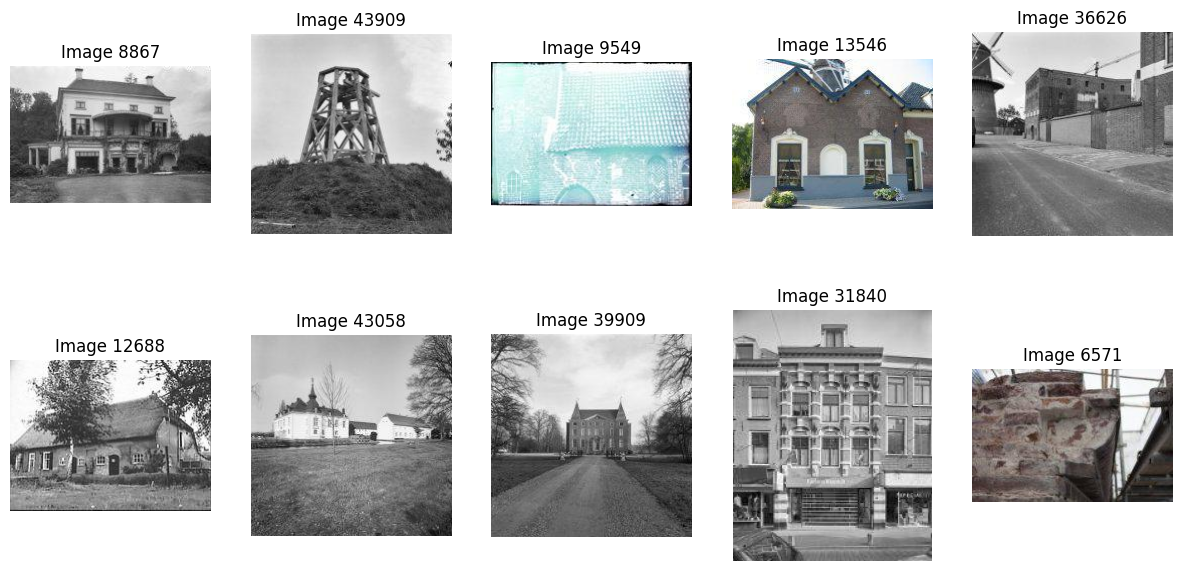

In [ ]:
import matplotlib.pyplot as plt
import random

# Get the images (you may adjust this based on how your dataset returns them)
images = dataset.get_images()

# Randomly select 20 indices (ensure there are enough images)
num_images_to_show = 10
random_indices = random.sample(range(len(images)), min(num_images_to_show, len(images)))

# Display the selected random images
plt.figure(figsize=(15, 15))  # Increase the figure size to make room for multiple images
for i, idx in enumerate(random_indices):
    plt.subplot(4, 5, i+1)  # Create a 4x5 grid (4 rows, 5 columns)
    plt.imshow(images[idx])
    plt.axis('off')  # Hide axes for better visualization
    plt.title(f"Image {idx+1}")

plt.show()


In [ ]:
print(len(images))

46061


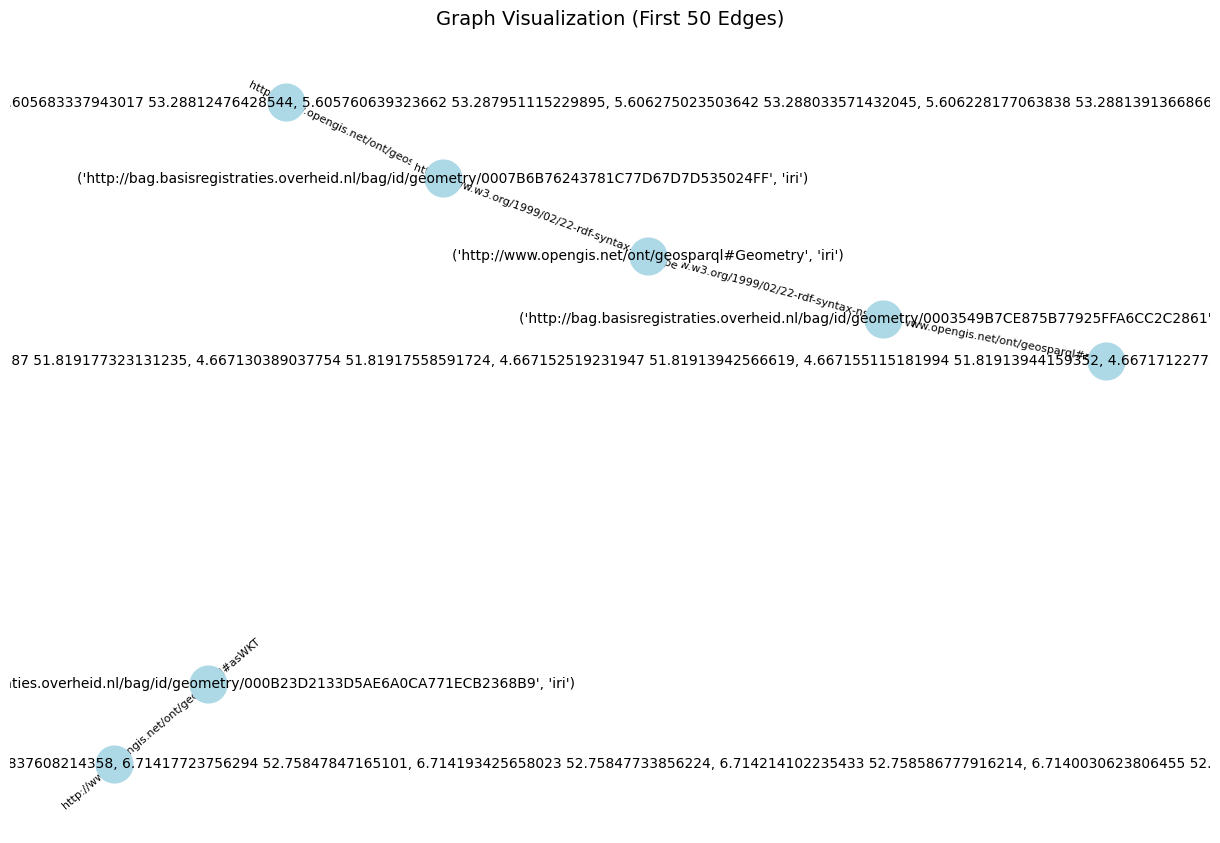

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()
n=5
# Add edges from dataset (taking a subset for visualization)
for (s, p, o) in dataset.triples[:n]:  # First 50 triples
    G.add_edge(dataset.i2e[s], dataset.i2e[o], label=dataset.i2r[p])

# Use a better layout
pos = nx.spring_layout(G, seed=42)  # For better spacing

# Plot the graph with enhancements
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=700, font_size=10, edge_color="gray", node_color="lightblue")

# Draw edge labels
edge_labels = {(dataset.i2e[s], dataset.i2e[o]): dataset.i2r[p] for (s, p, o) in dataset.triples[:n]}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Graph Visualization", fontsize=14)
plt.show()


In [ ]:
unique_relations = set()  # Store unique predicates

for (_, p, _) in dataset.triples:  # Loop through triples
    unique_relations.add(dataset.i2r[p])  # Convert index to relation string

# Print all unique relationships
print("Unique Relationships (Predicates) in the Graph:")
for rel in sorted(unique_relations):  # Sorting for easier readability
    print(rel)

# Count of unique relations
print("\nTotal Unique Relationships:", len(unique_relations))


Unique Relationships (Predicates) in the Graph:
http://data.pdok.nl/def/pdok#asWKT-RD
http://dbpedia.org/ontology/city
http://dbpedia.org/ontology/codeNationalMonument
http://dbpedia.org/ontology/location
http://dbpedia.org/ontology/name
http://dbpedia.org/ontology/neighbourhood
http://dbpedia.org/ontology/thumbnail
http://purl.org/dc/terms/created
http://purl.org/dc/terms/creator
http://purl.org/dc/terms/description
http://purl.org/dc/terms/isPartOf
http://purl.org/dc/terms/spatial
http://schema.org/dateCreated
http://schema.org/roleName
http://www.geonames.org/ontology#alternateName
http://www.geonames.org/ontology#countryCode
http://www.geonames.org/ontology#featureClass
http://www.geonames.org/ontology#featureCode
http://www.geonames.org/ontology#locationMap
http://www.geonames.org/ontology#name
http://www.geonames.org/ontology#nearbyFeatures
http://www.geonames.org/ontology#officialName
http://www.geonames.org/ontology#parentADM1
http://www.geonames.org/ontology#parentADM2
http://

Number of Unique Nodes: 341270


In [ ]:
print(dataset.i2e[130685])  # Get subject name
print(dataset.i2r[28])      # Get relation name
print(dataset.i2e[54795])   # Get object name


('http://bag.basisregistraties.overheid.nl/bag/id/geometry/0003549B7CE875B77925FFA6CC2C2861', 'iri')
http://www.opengis.net/ont/geosparql#asWKT
('POLYGON ((4.667227191836703 51.81920171648348, 4.667236120685068 51.819203883584755, 4.6672263678506125 51.81920790458488, 4.667215533196375 51.81921064256385, 4.667204024085515 51.81921201912295, 4.667192305891625 51.8192119562197, 4.667180842410027 51.81921047467658, 4.6671700681438875 51.819207613114045, 4.667166621983456 51.81920634255311, 4.667156165455297 51.819200840285575, 4.667147349428573 51.81919433236882, 4.667140403217145 51.81918699099386, 4.667135780138812 51.819179493088576, 4.667129317016587 51.819177323131235, 4.667130389037754 51.81917558591724, 4.667152519231947 51.81913942566619, 4.667155115181994 51.81913944159352, 4.667171227731092 51.81912317217984, 4.6671213056248275 51.81910588638567, 4.66711781270861 51.81910936152579, 4.667104906737694 51.819105570038566, 4.6672250864548825 51.818990174460154, 4.667266511602796 51.

In [ ]:
# Get the first two nodes
nodes_list = list(G.nodes())  # Convert nodes to a list

if len(nodes_list) >= 2:
    node1, node2 = nodes_list[:2]  # Extract first two nodes
    print("First node:", node1)
    print("Second node:", node2)
elif len(nodes_list) == 1:
    print("Only one node present:", nodes_list[0])
else:
    print("Graph has no nodes.")

# Get one example edge with label (if available)
if len(G.edges) > 0:
    example_edge = next(iter(G.edges(data=True)))
    u, v, data = example_edge
    relation_label = data.get("label", "Unknown")
    print(f"Example edge: {u} --({relation_label})--> {v}")
else:
    print("Graph has no edges.")


First node: ('http://bag.basisregistraties.overheid.nl/bag/id/geometry/0003549B7CE875B77925FFA6CC2C2861', 'iri')
Second node: ('POLYGON ((4.667227191836703 51.81920171648348, 4.667236120685068 51.819203883584755, 4.6672263678506125 51.81920790458488, 4.667215533196375 51.81921064256385, 4.667204024085515 51.81921201912295, 4.667192305891625 51.8192119562197, 4.667180842410027 51.81921047467658, 4.6671700681438875 51.819207613114045, 4.667166621983456 51.81920634255311, 4.667156165455297 51.819200840285575, 4.667147349428573 51.81919433236882, 4.667140403217145 51.81918699099386, 4.667135780138812 51.819179493088576, 4.667129317016587 51.819177323131235, 4.667130389037754 51.81917558591724, 4.667152519231947 51.81913942566619, 4.667155115181994 51.81913944159352, 4.667171227731092 51.81912317217984, 4.6671213056248275 51.81910588638567, 4.66711781270861 51.81910936152579, 4.667104906737694 51.819105570038566, 4.6672250864548825 51.818990174460154, 4.667266511602796 51.819007309211784, 4

New visualisation

In [ ]:
!pip install adjustText


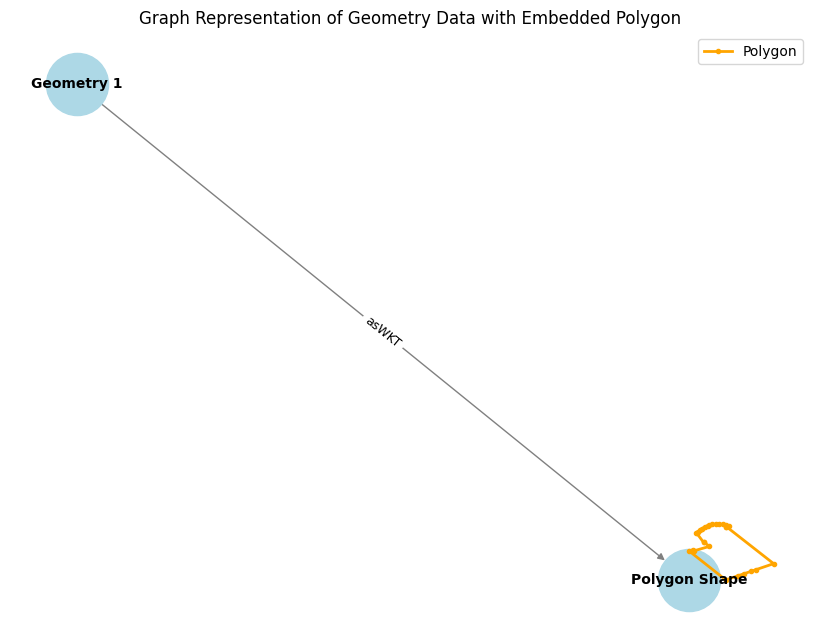

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.wkt import loads  # To parse WKT polygon

# Create a directed graph
G = nx.DiGraph()

# Example node identifiers
geometry_node = "Geometry 1"
polygon_node = "Polygon Shape"
edge_label = "asWKT"

# Add nodes with metadata
G.add_node(geometry_node, full_url='http://bag.basisregistraties.overheid.nl/bag/id/geometry/0003549B7CE875B77925FFA6CC2C2861')
G.add_node(polygon_node, full_url='http://www.opengis.net/ont/geosparql#wktLiteral')

# Add edge
G.add_edge(geometry_node, polygon_node, label=edge_label)

# Compute positions using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw graph nodes and edges
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=2000, font_size=10, font_weight="bold")

# Draw edge labels
edge_labels = {(geometry_node, polygon_node): edge_label}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# POLYGON DATA
wkt_polygon = "POLYGON ((4.667227191836703 51.81920171648348, 4.667236120685068 51.819203883584755, 4.6672263678506125 51.81920790458488, 4.667215533196375 51.81921064256385, 4.667204024085515 51.81921201912295, 4.667192305891625 51.8192119562197, 4.667180842410027 51.81921047467658, 4.6671700681438875 51.819207613114045, 4.667166621983456 51.81920634255311, 4.667156165455297 51.819200840285575, 4.667147349428573 51.81919433236882, 4.667140403217145 51.81918699099386, 4.667135780138812 51.819179493088576, 4.667129317016587 51.819177323131235, 4.667130389037754 51.81917558591724, 4.667152519231947 51.81913942566619, 4.667155115181994 51.81913944159352, 4.667171227731092 51.81912317217984, 4.6671213056248275 51.81910588638567, 4.66711781270861 51.81910936152579, 4.667104906737694 51.819105570038566, 4.6672250864548825 51.818990174460154, 4.667266511602796 51.819007309211784, 4.667283154068365 51.819014170743344, 4.667307706464115 51.81902433467257, 4.6673250116089795 51.81903147891019, 4.667381551819727 51.81905485454895, 4.667227191836703 51.81920171648348))"

# Parse the WKT polygon
polygon = loads(wkt_polygon)

# Extract polygon coordinates
polygon_coords = list(polygon.exterior.coords)
x_vals, y_vals = zip(*polygon_coords)

# Position the polygon inside the "Polygon Shape" node
polygon_center = pos[polygon_node]

# Adjust polygon coordinates to fit within the node
scale_factor = 1000  # Adjust this for better fit
x_scaled = [polygon_center[0] + scale_factor * (x - min(x_vals)) for x in x_vals]
y_scaled = [polygon_center[1] + scale_factor * (y - min(y_vals)) for y in y_vals]

# Plot the polygon INSIDE the node
plt.plot(x_scaled, y_scaled, color='orange', linewidth=2, marker="o", markersize=3, label="Polygon")

# Show title and legend
plt.title("Graph Representation of Geometry Data with Embedded Polygon", fontsize=12)
plt.legend()
plt.show()


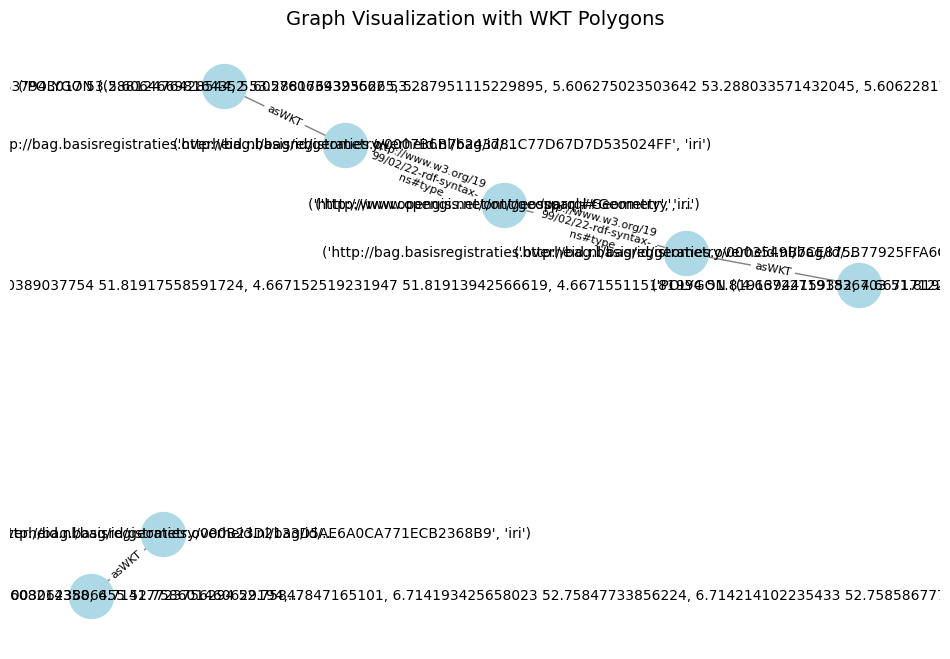

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.wkt import loads
from shapely.geometry import Polygon
import textwrap


def shorten_label(label, max_length=50):
    """Shorten long node labels for better visualization."""
    label = str(label)

    return label[:max_length] + "..." if len(label) > max_length else label

# Create a graph
G = nx.Graph()
n = 5  # Number of triples to visualize
polygons = []  # Store polygons separately for plotting

# Add edges and detect polygons
for (s, p, o) in dataset.triples[:n]:
    node1 = dataset.i2e[s]
    node2 = dataset.i2e[o]
    relation = dataset.i2r[p]

    # Handle WKT polygons separately
    if is_wkt_polygon(node2):
        polygons.append(loads(node2))  # Convert WKT to geometry for plotting
        node2 = "[POLYGON]"  # Replace with a simple label

    # Add edges with shorter relations (e.g., show "asWKT" instead of long URIs)
    relation = "asWKT" if relation == "http://www.opengis.net/ont/geosparql#asWKT" else relation
    G.add_edge(node1, node2, label=relation)

# Use a better layout
pos = nx.spring_layout(G, seed=42)

# Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1000, font_size=10,
        edge_color="gray", node_color="lightblue", ax=ax)

# Format edge labels
edge_labels = {(u, v): textwrap.fill(data["label"], width=20) for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)

# Shorten node labels for clarity
node_labels = {node: shorten_label(node) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10, ax=ax)

# Plot the polygons separately
for poly in polygons:
    x, y = poly.exterior.xy  # Extract polygon coordinates
    ax.fill(x, y, alpha=0.4, fc="lightgreen", edgecolor="green")

# Set title
plt.title("Graph Visualization with WKT Polygons", fontsize=14)

# Show the plot
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from shapely.wkt import loads
from shapely.geometry import Polygon
import textwrap

# Function to check if a node contains a WKT POLYGON
def is_wkt_polygon(node):
    return isinstance(node, str) and node.startswith("POLYGON")

# Function to shorten long URIs or WKT literals
def shorten_label(label, max_length=10):
    label = str(label)
    if is_wkt_polygon(label):
        return "[POLYGON]"  # Replace polygons with a generic label
    label=label[:max_length] + "..." if len(label) > max_length else label
    return textwrap.fill(label, width=10)  # Wrap text for better visualization

# Create a graph
G = nx.Graph()
n = 100  # Limit the number of triples to visualize
polygons = []  # Store polygons separately for plotting

# Add edges and detect polygons
for (s, p, o) in dataset.triples[:n]:
    node1 = dataset.i2e[s]
    node2 = dataset.i2e[o]
    relation = dataset.i2r[p]






    # Rename relation if it's "asWKT"
    G.add_edge(node1, node2, label=relation)

# Use a better layout
pos = nx.kamada_kawai_layout(G)

# Create figure
fig, ax = plt.subplots(figsize=(100, 100))

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=10,
        edge_color="gray", node_color="skyblue", ax=ax)

# Format edge labels with better wrapping
edge_labels = {(u, v): textwrap.fill(data["label"], width=17) for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, ax=ax)



# Plot the polygons separately
for poly in polygons:
    x, y = poly.exterior.xy  # Extract polygon coordinates
    ax.fill(x, y, alpha=0.4, fc="lightgreen", edgecolor="green", linewidth=1)

# Set title
plt.title("Graph Visualization with WKT Polygons", fontsize=14)
plt.savefig("graph_visualization.png", dpi=300, bbox_inches="tight")  # Saving with high DPI

# Show the plot
plt.show()


<Figure size 640x480 with 0 Axes>

In [ ]:
for u, v, data in G.edges(data=True):
    print(v)



('POLYGON ((4.667227191836703 51.81920171648348, 4.667236120685068 51.819203883584755, 4.6672263678506125 51.81920790458488, 4.667215533196375 51.81921064256385, 4.667204024085515 51.81921201912295, 4.667192305891625 51.8192119562197, 4.667180842410027 51.81921047467658, 4.6671700681438875 51.819207613114045, 4.667166621983456 51.81920634255311, 4.667156165455297 51.819200840285575, 4.667147349428573 51.81919433236882, 4.667140403217145 51.81918699099386, 4.667135780138812 51.819179493088576, 4.667129317016587 51.819177323131235, 4.667130389037754 51.81917558591724, 4.667152519231947 51.81913942566619, 4.667155115181994 51.81913944159352, 4.667171227731092 51.81912317217984, 4.6671213056248275 51.81910588638567, 4.66711781270861 51.81910936152579, 4.667104906737694 51.819105570038566, 4.6672250864548825 51.818990174460154, 4.667266511602796 51.819007309211784, 4.667283154068365 51.819014170743344, 4.667307706464115 51.81902433467257, 4.6673250116089795 51.81903147891019, 4.667381551819

#Entity Frequency Analysis





In [ ]:
from collections import Counter

# Extract entities (converting tensor to integer)
entities = [int(triple[0]) for triple in dataset.triples] + [int(triple[2]) for triple in dataset.triples]

# Count occurrences
entity_counts = Counter(entities)

# Display actual most frequent entities
print("Most common entities:", entity_counts.most_common(10))

# Check unique and rare entities again
rare_entities = [e for e, c in entity_counts.items() if c == 1]
print(f"Number of rare entities (appear once): {len(rare_entities)}")


Most common entities: [(201822, 65576), (211084, 60996), (341077, 23232), (28996, 18146), (23569, 16868), (25943, 13544), (79498, 9396), (337400, 8230), (19920, 8090), (25196, 6023)]
Number of rare entities (appear once): 250658


In [ ]:
import numpy as np
sorted_entities = entity_counts.most_common()

# Compute cumulative sum
frequencies = np.array([count for _, count in sorted_entities])
cumulative_freq = np.cumsum(frequencies) / sum(frequencies)  # Normalize to [0,1]

# Find 80% cutoff point
cutoff_index = np.searchsorted(cumulative_freq, 0.8)
top_entities = sorted_entities[:cutoff_index]

print(f"Number of entities covering 80% of occurrences: {len(top_entities)}")
print("Example top entities:", top_entities[:10])

Number of entities covering 80% of occurrences: 68865
Example top entities: [(201822, 65576), (211084, 60996), (341077, 23232), (28996, 18146), (23569, 16868), (25943, 13544), (79498, 9396), (337400, 8230), (19920, 8090), (25196, 6023)]


In [ ]:
# Get the top 10 most common entity indices


# Print entity names using i2e mapping
for entity_id, count in top_entities[:10]:
    entity_name = dataset.i2e[entity_id]  # Convert ID to actual entity
    print(f"Entity: {entity_name} (ID: {entity_id}) appears {count} times.")


Entity: ('http://www.opengis.net/ont/geosparql#Geometry', 'iri') (ID: 201822) appears 65576 times.
Entity: ('https://data.labs.pdok.nl/rce/def/Afbeelding', 'iri') (ID: 211084) appears 60996 times.
Entity: ('zwart wit negatief', '@nl-nl') (ID: 341077) appears 23232 times.
Entity: ('Fotocollectie', '@nl-nl') (ID: 28996) appears 18146 times.
Entity: ('Collectie gebouwd', '@nl-nl') (ID: 23569) appears 16868 times.
Entity: ('Dukker, G.J.', 'none') (ID: 25943) appears 13544 times.
Entity: ('Wal, A.J. van der', 'none') (ID: 79498) appears 9396 times.
Entity: ('true', 'http://www.w3.org/2001/XMLSchema#boolean') (ID: 337400) appears 8230 times.
Entity: ('Agrarisch Erfgoed - Fotocollectie SHBO', '@nl-nl') (ID: 19920) appears 8090 times.
Entity: ('Digitale opname', '@nl-nl') (ID: 25196) appears 6023 times.


In [ ]:
# Get statistics
total_entities = len(entity_counts)
rare_entity_count = len(rare_entities)
rare_entity_ratio = rare_entity_count / total_entities

print(f"Total Entities: {total_entities}")
print(f"Rare Entities (appear once): {rare_entity_count}")
print(f"Rare Entity Ratio: {rare_entity_ratio:.2%}")


Total Entities: 341270
Rare Entities (appear once): 250658
Rare Entity Ratio: 73.45%


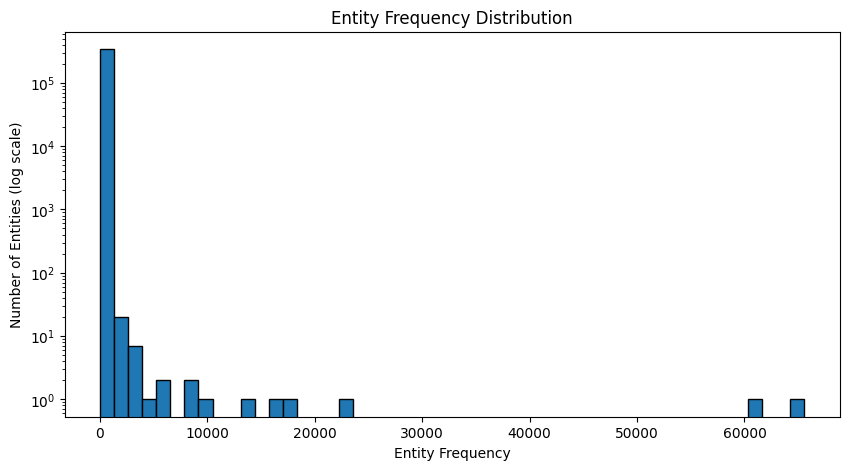

In [ ]:
import matplotlib.pyplot as plt

# Get frequencies of all entities
entity_frequencies = list(entity_counts.values())

# Plot histogram (log-scale for better visualization)
plt.figure(figsize=(10, 5))
plt.hist(entity_frequencies, bins=50, log=True, edgecolor="black")
plt.xlabel("Entity Frequency")
plt.ylabel("Number of Entities (log scale)")
plt.title("Entity Frequency Distribution")
plt.show()


In [ ]:
import networkx as nx

# Create a graph where entities are nodes and relations are edges
G = nx.Graph()
G.add_edges_from([(t[0], t[2]) for t in dataset.triples])

# Compute connectivity statistics
num_components = nx.number_connected_components(G)
largest_component = max(nx.connected_components(G), key=len)
largest_component_ratio = len(largest_component) / total_entities

print(f"Number of Connected Components: {num_components}")

print(f"Largest Component Size: {len(largest_component)} ({largest_component_ratio:.2%} of all nodes)")
print(f"Average Node Degree: {sum(dict(G.degree()).values()) / len(G.nodes())}")

Number of Connected Components: 777124
Largest Component Size: 2 (0.00% of all nodes)


In [ ]:

# Count relation occurrences
relation_counts = Counter([int(triple[1]) for triple in dataset.triples])

# Get most common relations
most_common_relations = relation_counts.most_common(10)

least_common_relations = sorted(relation_counts.items(), key=lambda x: x[1])[:10]

# Display results
print("Most common relations:")
for relation_id, count in most_common_relations:
    print(f"Relation: {dataset.i2r[relation_id]} (ID: {relation_id}) appears {count} times.")

print("\nLeast common relations:")
for relation_id, count in least_common_relations:
    print(f"Relation: {dataset.i2r[relation_id]} (ID: {relation_id}) appears {count} times.")


Most common relations:
Relation: http://www.w3.org/1999/02/22-rdf-syntax-ns#type (ID: 31) appears 130126 times.
Relation: http://purl.org/dc/terms/description (ID: 9) appears 57042 times.
Relation: http://xmlns.com/foaf/0.1/depicts (ID: 41) appears 47872 times.
Relation: http://xmlns.com/foaf/0.1/depiction (ID: 40) appears 47872 times.
Relation: http://purl.org/dc/terms/isPartOf (ID: 10) appears 47384 times.
Relation: https://data.labs.pdok.nl/rce/def/locator (ID: 52) appears 46123 times.
Relation: http://dbpedia.org/ontology/thumbnail (ID: 6) appears 46108 times.
Relation: http://purl.org/dc/terms/creator (ID: 8) appears 45111 times.
Relation: http://purl.org/dc/terms/created (ID: 7) appears 44216 times.
Relation: https://data.labs.pdok.nl/rce/def/fotograaf (ID: 45) appears 43964 times.

Least common relations:
Relation: https://data.labs.pdok.nl/rce/def/graveur (ID: 46) appears 1 times.
Relation: http://www.w3.org/2003/01/geo/wgs84_pos#alt (ID: 36) appears 3 times.
Relation: https://

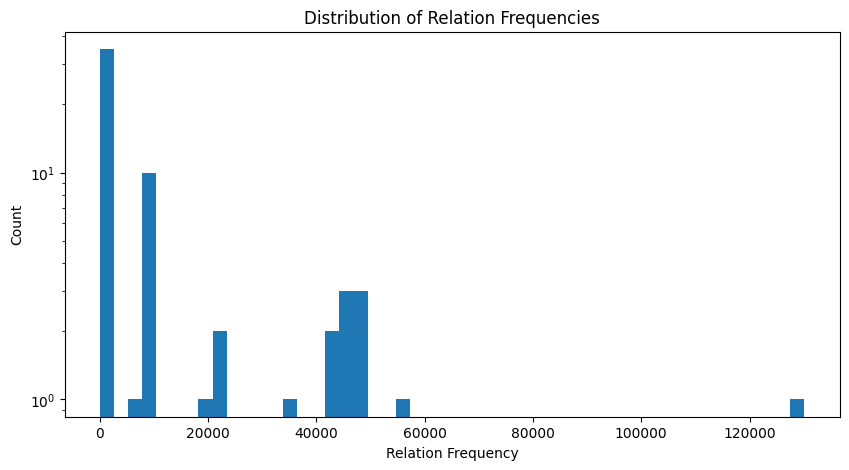

In [ ]:

# Get relation frequencies
relation_frequencies = list(relation_counts.values())

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(relation_frequencies, bins=50, log=True)  # Log scale for better visualization
plt.xlabel("Relation Frequency")
plt.ylabel("Count")
plt.title("Distribution of Relation Frequencies")
plt.show()


resembles a Zipfian distribution

In [ ]:
relation_usage = {int(relation): set() for relation in relation_counts.keys()}  # Ensure keys are integers

for head, rel, tail in dataset.triples:
    rel = int(rel)  # Convert tensor to integer
    head = int(head)
    tail = int(tail)

    relation_usage[rel].add(head)
    relation_usage[rel].add(tail)

relation_connectivity = {rel: len(entities) for rel, entities in relation_usage.items()}
sorted_connectivity = sorted(relation_connectivity.items(), key=lambda x: x[1], reverse=True)

# Print top 10 most connected relations
print("Top 10 most connected relations:")
for rel, count in sorted_connectivity[:10]:
    print(f"Relation: {dataset.i2r[rel]} connects {count} unique entities")


Top 10 most connected relations:
Relation: http://www.w3.org/1999/02/22-rdf-syntax-ns#type connects 129374 unique entities
Relation: https://data.labs.pdok.nl/rce/def/locator connects 92214 unique entities
Relation: http://dbpedia.org/ontology/thumbnail connects 92169 unique entities
Relation: http://purl.org/dc/terms/description connects 89927 unique entities
Relation: http://xmlns.com/foaf/0.1/depicts connects 56268 unique entities
Relation: http://xmlns.com/foaf/0.1/depiction connects 56268 unique entities
Relation: http://purl.org/dc/terms/isPartOf connects 47422 unique entities
Relation: http://purl.org/dc/terms/creator connects 45738 unique entities
Relation: http://purl.org/dc/terms/created connects 45298 unique entities
Relation: https://data.labs.pdok.nl/rce/def/fotograaf connects 44428 unique entities


In [ ]:
rare_relations = [rel for rel, count in relation_counts.items() if count == 1]
print(f"Number of relations that appear only once: {len(rare_relations)}")
print(f"Percentage of sparse relations: {len(rare_relations) / len(relation_counts) * 100:.2f}%")


Number of relations that appear only once: 1
Percentage of sparse relations: 1.67%


In [ ]:
from collections import defaultdict
import itertools

entity_relation_map = defaultdict(set)

for head, rel, tail in dataset.triples:
    rel = int(rel)  # Convert tensor to integer
    head = int(head)
    tail = int(tail)
    entity_relation_map[head].add(rel)

co_occurrence_counts = Counter()

for relations in entity_relation_map.values():
    for rel1, rel2 in itertools.combinations(relations, 2):
        co_occurrence_counts[(rel1, rel2)] += 1

# Print most common relation pairs
print("Top 10 most co-occurring relation pairs:")
for (rel1, rel2), count in co_occurrence_counts.most_common(10):
    print(f"Relations: {dataset.i2r[rel1]} & {dataset.i2r[rel2]} appear together {count} times.")


Top 10 most co-occurring relation pairs:
Relations: http://purl.org/dc/terms/description & http://xmlns.com/foaf/0.1/depicts appear together 47872 times.
Relations: http://purl.org/dc/terms/description & http://www.w3.org/1999/02/22-rdf-syntax-ns#type appear together 47872 times.
Relations: http://xmlns.com/foaf/0.1/depicts & http://www.w3.org/1999/02/22-rdf-syntax-ns#type appear together 47872 times.
Relations: http://purl.org/dc/terms/description & http://purl.org/dc/terms/isPartOf appear together 47384 times.
Relations: http://purl.org/dc/terms/isPartOf & http://xmlns.com/foaf/0.1/depicts appear together 47384 times.
Relations: http://purl.org/dc/terms/isPartOf & http://www.w3.org/1999/02/22-rdf-syntax-ns#type appear together 47384 times.
Relations: http://purl.org/dc/terms/description & https://data.labs.pdok.nl/rce/def/locator appear together 46123 times.
Relations: http://xmlns.com/foaf/0.1/depicts & https://data.labs.pdok.nl/rce/def/locator appear together 46123 times.
Relations

In [ ]:

# Create a directed graph
G = nx.DiGraph()
G.add_edges_from([(triple[0], triple[2]) for triple in dataset.triples])

# Compute graph properties
print(f"Number of Connected Components: {nx.number_weakly_connected_components(G)}")
print(f"Average Node Degree: {sum(dict(G.degree()).values()) / len(G.nodes())}")

Number of Connected Components: 777124
Average Node Degree: 1.0


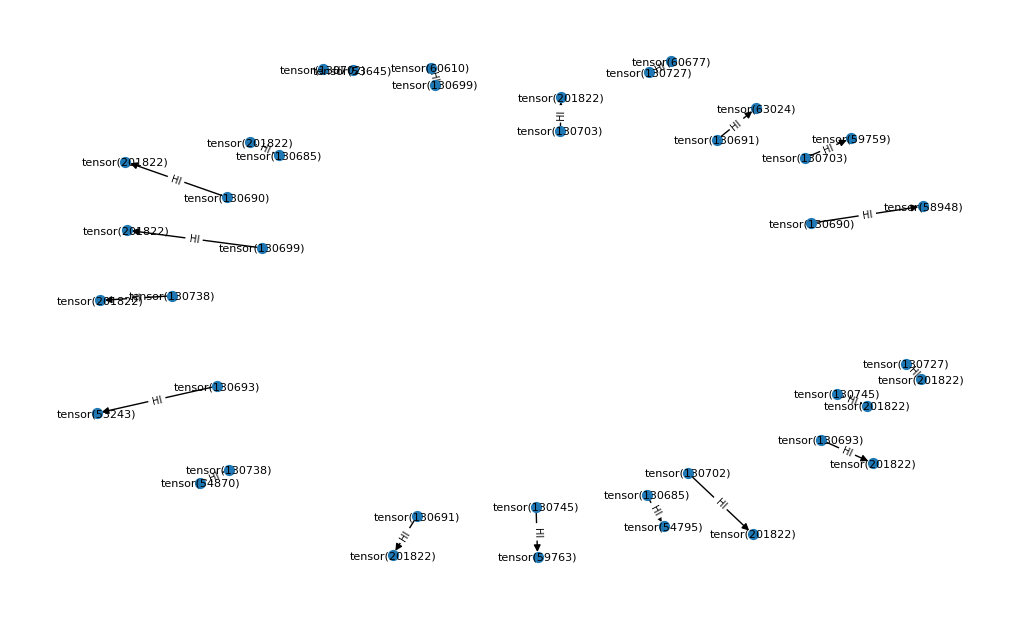

In [ ]:
# Draw a small subgraph for visualization
plt.figure(figsize=(10,6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=50, font_size=8)
edge_labels = {(u, v):"HI" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
plt.show()

In [ ]:
# Convert to a set to remove duplicates
unique_triples = set(dataset.triples)

# Check how many duplicates were present
num_duplicates = len(dataset.triples) - len(unique_triples)
print(f"Number of duplicate triples: {num_duplicates}")

Number of duplicate triples: 0


In [ ]:
type(dataset.triples)

torch.Tensor

In [ ]:
import torch

In [ ]:
# Check for missing values in dataset.triples
missing_triples = [triple for triple in dataset.triples if torch.isnan(triple).any() or torch.isinf(triple).any()]
print(f"Number of missing triples: {len(missing_triples)}")




Number of missing triples: 0


RuntimeError: Tensor.__contains__ only supports Tensor or scalar, but you passed in a <class 'NoneType'>.

In [ ]:
type(dataset.triples[1] )

torch.Tensor

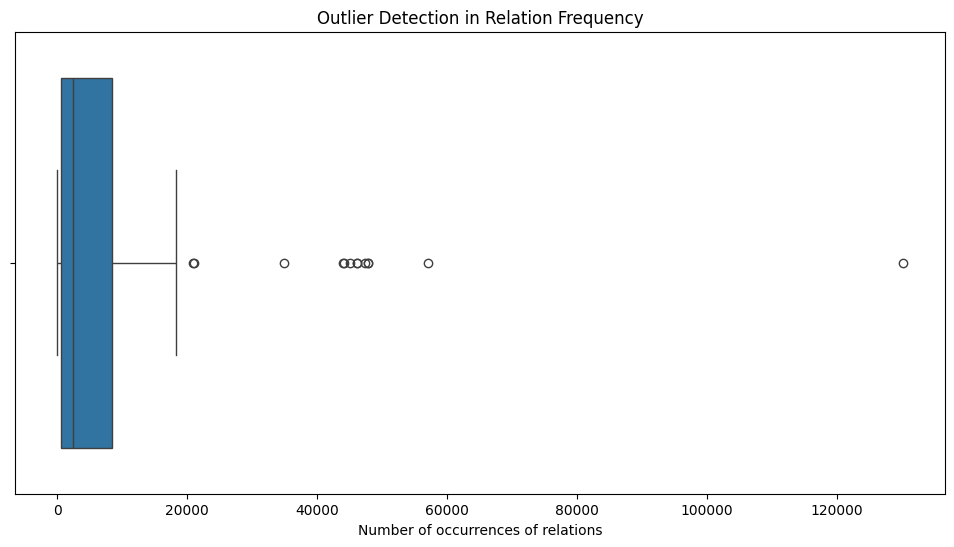

TypeError: list indices must be integers or slices, not dict

In [ ]:
# Count occurrences of each relation
relation_counts = Counter(int(triple[1].item()) for triple  in dataset.triples)

# Plot distribution
plt.figure(figsize=(12,6))
sns.boxplot(x=list(relation_counts.values()))
plt.xlabel("Number of occurrences of relations")
plt.title("Outlier Detection in Relation Frequency")
plt.show()

# Find relations appearing significantly more or less
q1 = np.percentile(list(relation_counts.values()), 25)
q3 = np.percentile(list(relation_counts.values()), 75)
iqr = q3 - q1

# Define outliers as relations occurring way outside normal range
outlier_threshold = q3 + 1.5 * iqr
outlier_relations = {rel: count for rel, count in relation_counts.items() if count > outlier_threshold}



In [ ]:
outlier_keys = list(outlier_relations.keys())  # Extract relation indices
outlier_names = [dataset.i2r[key] for key in outlier_keys]  # Convert indices to names

print(f"Outlier relations (very high frequency): {outlier_names}")


Outlier relations (very high frequency): ['http://www.opengis.net/ont/geosparql#asWKT', 'http://www.w3.org/1999/02/22-rdf-syntax-ns#type', 'http://www.opengis.net/ont/geosparql#hasGeometry', 'http://dbpedia.org/ontology/thumbnail', 'http://purl.org/dc/terms/created', 'http://purl.org/dc/terms/creator', 'http://purl.org/dc/terms/description', 'http://purl.org/dc/terms/isPartOf', 'http://xmlns.com/foaf/0.1/depicts', 'https://data.labs.pdok.nl/rce/def/fotograaf', 'https://data.labs.pdok.nl/rce/def/locator', 'https://data.labs.pdok.nl/rce/def/techniek', 'http://xmlns.com/foaf/0.1/depiction']


In [ ]:
outlier_keys = list(outlier_relations.keys())  # Extract relation indices

# Extract only the relation keys from the least common ones
low_freq_relations = [relation for relation, _ in relation_counts.most_common()[-10:]]

# Convert indices to relation names
outlier_names = [dataset.i2r[key] for key in low_freq_relations]

print(f"Outlier relations (very low frequency): {outlier_names}")



Outlier relations (very low frequency): ['http://purl.org/dc/terms/spatial', 'http://dbpedia.org/ontology/neighbourhood', 'https://data.labs.pdok.nl/rce/def/huisnummerToevoeging', 'http://dbpedia.org/ontology/location', 'http://www.geonames.org/ontology#officialName', 'https://data.labs.pdok.nl/rce/def/schilder', 'https://data.labs.pdok.nl/rce/def/reprofotograaf', 'https://data.labs.pdok.nl/rce/def/ontwerper', 'http://www.w3.org/2003/01/geo/wgs84_pos#alt', 'https://data.labs.pdok.nl/rce/def/graveur']
11: 260 occurrences
5: 258 occurrences
49: 212 occurrences
3: 156 occurrences
21: 55 occurrences
56: 36 occurrences
54: 8 occurrences
53: 7 occurrences
36: 3 occurrences
46: 1 occurrences


In [ ]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add edges with relations as edge attributes
G.add_edges_from([(int(triple[0].item()), int(triple[2].item()), {"relation": triple[1]}) for triple in dataset.triples])

# Find all entities appearing in triples (convert tensors to integers)
all_entities = set(int(triple[0].item()) for triple in dataset.triples) | set(int(triple[2].item()) for triple in dataset.triples)

# Add all entities to the graph explicitly
G.add_nodes_from(all_entities)

# Now find isolated nodes
connected_entities = set(G.nodes())
isolated_nodes = all_entities - connected_entities

print(f"Number of isolated nodes: {len(isolated_nodes)}")  # Should now give correct result
if G.number_of_nodes() > 0:
    node_max_in = max(G.in_degree(), key=lambda x: x[1], default=(None, 0))   # Node with max in-degree
    node_max_out = max(G.out_degree(), key=lambda x: x[1], default=(None, 0)) # Node with max out-degree
    node_max_total = max(G.degree(), key=lambda x: x[1], default=(None, 0))  # Node with max total degree

    print(f"Node with max in-degree: {node_max_in[0]} (Degree: {node_max_in[1]})")
    print(f"Node with max out-degree: {node_max_out[0]} (Degree: {node_max_out[1]})")
    print(f"Node with max total degree: {node_max_total[0]} (Degree: {node_max_total[1]})")
else:
    print("Graph has no nodes.")


KeyboardInterrupt: 

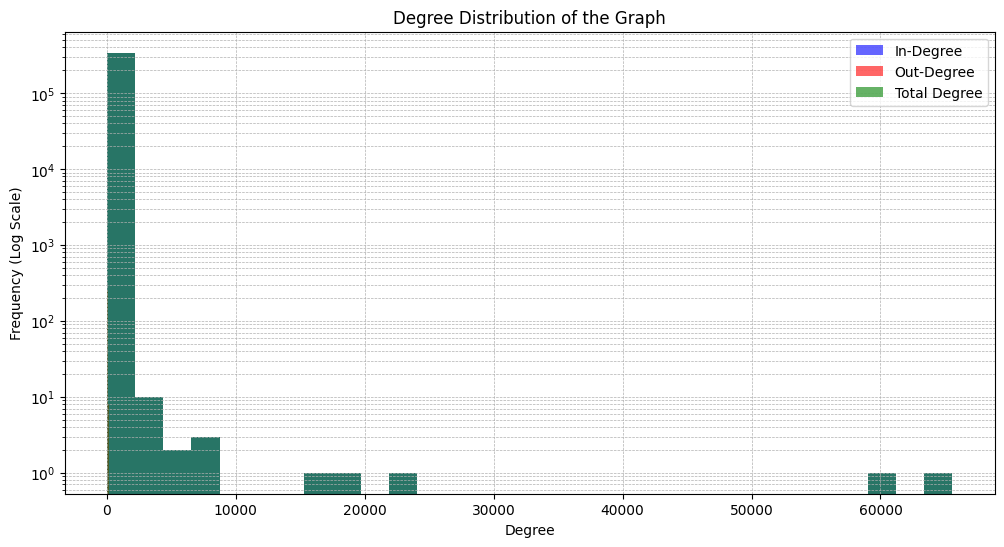

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add edges with relations as edge attributes
G.add_edges_from([(int(triple[0].item()), int(triple[2].item()), {"relation": triple[1]}) for triple in dataset.triples])

# Compute degrees
in_degrees = [G.in_degree(n) for n in G.nodes()]
out_degrees = [G.out_degree(n) for n in G.nodes()]
total_degrees = [G.degree(n) for n in G.nodes()]

# Plot degree distributions
plt.figure(figsize=(12, 6))

plt.hist(in_degrees, bins=30, alpha=0.6, label="In-Degree", color="blue", log=True)
plt.hist(out_degrees, bins=30, alpha=0.6, label="Out-Degree", color="red", log=True)
plt.hist(total_degrees, bins=30, alpha=0.6, label="Total Degree", color="green", log=True)

plt.xlabel("Degree")
plt.ylabel("Frequency (Log Scale)")
plt.title("Degree Distribution of the Graph")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


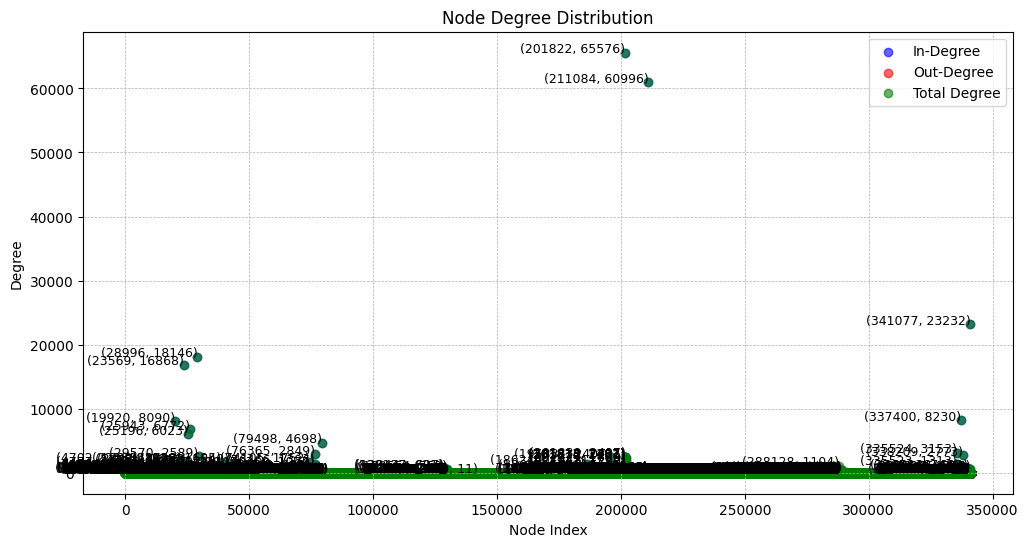

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Compute degrees
node_indices = list(G.nodes())  # Get the node indices
in_degrees = [G.in_degree(n) for n in node_indices]
out_degrees = [G.out_degree(n) for n in node_indices]
total_degrees = [G.degree(n) for n in node_indices]

# Plot scatter graph
plt.figure(figsize=(12, 6))

scatter_in = plt.scatter(node_indices, in_degrees, label="In-Degree", color="blue", alpha=0.6)
scatter_out = plt.scatter(node_indices, out_degrees, label="Out-Degree", color="red", alpha=0.6)
scatter_total = plt.scatter(node_indices, total_degrees, label="Total Degree", color="green", alpha=0.6)

# Annotate points where the total degree > 10
for i, (node, degree) in enumerate(zip(node_indices, total_degrees)):
    if degree > 10:
        plt.text(node, degree, f"({node}, {degree})", fontsize=9, color="black", ha="right")

plt.xlabel("Node Index")
plt.ylabel("Degree")
plt.title("Node Degree Distribution")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()


In [ ]:
# Annotate points where the total degree > 10
for i, (node, degree) in enumerate(zip(node_indices, total_degrees)):
    if degree > 10000:
        plt.text(node, degree, f"({node}, {degree})", fontsize=9, color="black", ha="right")

plt.xlabel("Node Index")
plt.ylabel("Degree")
plt.title("Node Degree Distribution")
plt.legend()
plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()

<ipython-input-7-74c48fd29b45>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


ValueError: Image size of 169174263x24236962 pixels is too large. It must be less than 2^23 in each direction.

<Figure size 640x480 with 1 Axes>

In [ ]:
print(dataset.i2e[201822 ],dataset.i2e[288128 ],dataset.i2e[201822  ])

('http://www.opengis.net/ont/geosparql#Geometry', 'iri') ('https://data.labs.pdok.nl/rce/id/monument/8336', 'iri') ('http://www.opengis.net/ont/geosparql#Geometry', 'iri')


In [ ]:
relations = set(int(triple[1].item()) for triple in dataset.triples)

print(f"Number of unique relations: {len(relations)}")


Number of unique relations: 60


In [ ]:
relation_names = [dataset.i2r[rel] for rel in relations]

print("Relations:", relation_names)

Relations: ['http://data.pdok.nl/def/pdok#asWKT-RD', 'http://dbpedia.org/ontology/city', 'http://dbpedia.org/ontology/codeNationalMonument', 'http://dbpedia.org/ontology/location', 'http://dbpedia.org/ontology/name', 'http://dbpedia.org/ontology/neighbourhood', 'http://dbpedia.org/ontology/thumbnail', 'http://purl.org/dc/terms/created', 'http://purl.org/dc/terms/creator', 'http://purl.org/dc/terms/description', 'http://purl.org/dc/terms/isPartOf', 'http://purl.org/dc/terms/spatial', 'http://schema.org/dateCreated', 'http://schema.org/roleName', 'http://www.geonames.org/ontology#alternateName', 'http://www.geonames.org/ontology#countryCode', 'http://www.geonames.org/ontology#featureClass', 'http://www.geonames.org/ontology#featureCode', 'http://www.geonames.org/ontology#locationMap', 'http://www.geonames.org/ontology#name', 'http://www.geonames.org/ontology#nearbyFeatures', 'http://www.geonames.org/ontology#officialName', 'http://www.geonames.org/ontology#parentADM1', 'http://www.geonam

In [ ]:
relation_dict = {
    "http://data.pdok.nl/def/pdok#asWKT-RD": "geometry",
    "http://dbpedia.org/ontology/city": "city",
    "http://dbpedia.org/ontology/codeNationalMonument": "monument_code",
    "http://dbpedia.org/ontology/location": "location",
    "http://dbpedia.org/ontology/name": "name",
    "http://dbpedia.org/ontology/neighbourhood": "neighbourhood",
    "http://dbpedia.org/ontology/thumbnail": "thumbnail",
    "http://purl.org/dc/terms/created": "created_date",
    "http://purl.org/dc/terms/creator": "creator",
    "http://purl.org/dc/terms/description": "description",
    "http://purl.org/dc/terms/isPartOf": "part_of",
    "http://purl.org/dc/terms/spatial": "spatial",
    "http://schema.org/dateCreated": "date_created",
    "http://schema.org/roleName": "role_name",
    "http://www.geonames.org/ontology#alternateName": "alt_name",
    "http://www.geonames.org/ontology#countryCode": "country_code",
    "http://www.geonames.org/ontology#featureClass": "feature_class",
    "http://www.geonames.org/ontology#featureCode": "feature_code",
    "http://www.geonames.org/ontology#locationMap": "location_map",
    "http://www.geonames.org/ontology#name": "name",
    "http://www.geonames.org/ontology#nearbyFeatures": "nearby_features",
    "http://www.geonames.org/ontology#officialName": "official_name",
    "http://www.geonames.org/ontology#parentADM1": "admin1_parent",
    "http://www.geonames.org/ontology#parentADM2": "admin2_parent",
    "http://www.geonames.org/ontology#parentCountry": "parent_country",
    "http://www.geonames.org/ontology#parentFeature": "parent_feature",
    "http://www.geonames.org/ontology#population": "population",
    "http://www.geonames.org/ontology#wikipediaArticle": "wikipedia",
    "http://www.opengis.net/ont/geosparql#asWKT": "geometry",
    "http://www.opengis.net/ont/geosparql#hasGeometry": "has_geometry",
    "http://www.opengis.net/ont/geosparql#sfWithin": "within",
    "http://www.w3.org/1999/02/22-rdf-syntax-ns#type": "type",
    "http://www.w3.org/2000/01/rdf-schema#isDefinedBy": "defined_by",
    "http://www.w3.org/2000/01/rdf-schema#label": "label",
    "http://www.w3.org/2000/01/rdf-schema#seeAlso": "see_also",
    "http://www.w3.org/2002/07/owl#sameAs": "same_as",
    "http://www.w3.org/2003/01/geo/wgs84_pos#alt": "altitude",
    "http://www.w3.org/2006/vcard/ns#hasStreetAddress": "street_address",
    "http://www.w3.org/2006/vcard/ns#postal-code": "postal_code",
    "http://www.w3.org/2006/vcard/ns#street-address": "street_address",
    "http://xmlns.com/foaf/0.1/depiction": "depiction",
    "http://xmlns.com/foaf/0.1/depicts": "depicts",
    "http://xmlns.com/foaf/0.1/name": "name",
    "https://data.labs.pdok.nl/rce/def/bouwjaar": "construction_year",
    "https://data.labs.pdok.nl/rce/def/complexnummer": "complex_number",
    "https://data.labs.pdok.nl/rce/def/fotograaf": "photographer",
    "https://data.labs.pdok.nl/rce/def/graveur": "engraver",
    "https://data.labs.pdok.nl/rce/def/huisnummer": "house_number",
    "https://data.labs.pdok.nl/rce/def/huisnummerCompleet": "full_house_number",
    "https://data.labs.pdok.nl/rce/def/huisnummerToevoeging": "house_number_suffix",
    "https://data.labs.pdok.nl/rce/def/internComplexNummers": "internal_complex_numbers",
    "https://data.labs.pdok.nl/rce/def/isFree": "is_free",
    "https://data.labs.pdok.nl/rce/def/locator": "locator",
    "https://data.labs.pdok.nl/rce/def/ontwerper": "designer",
    "https://data.labs.pdok.nl/rce/def/reprofotograaf": "reproduction_photographer",
    "https://data.labs.pdok.nl/rce/def/rnaSubject": "rna_subject",
    "https://data.labs.pdok.nl/rce/def/schilder": "painter",
    "https://data.labs.pdok.nl/rce/def/techniek": "technique",
    "https://data.labs.pdok.nl/rce/def/tekenaar": "drafter",
    "https://data.pldn.nl/cbs/wijken-buurten/def/cbs#regiocode": "region_code"
}
head_dict = {
    "https://data.labs.pdok.nl/.well-known/genid/": "genid",
    "https://data.pldn.nl/cbs/wijken-buurten/regios/2016/id/land-geografisch/": "geo_region",
    "http://sws.geonames.org/": "geonames",
    "https://data.labs.pdok.nl/cbs/id/gemeente/": "municipality",
    "https://data.pldn.nl/cbs/wijken-buurten/regios/2016/id/geometry/": "geometry",
    "https://data.labs.pdok.nl/rce/id/image/": "image_by_rce",
    "http://bag.basisregistraties.overheid.nl/bag/id/geometry/": "bag_geometry",
    "https://data.labs.pdok.nl/rce/id/monument/": "monument",
    "http://www.opengis.net/ont/geosparql": "GeoSparql",
    "https://data.labs.pdok.nl/rce/def/Afbeelding": "Afbeelding",
    "https://images.memorix.nl/rce/download/fullsize/": "fullsize_image_download",
    "http://data.cultureelerfgoed.nl/semnet/": "cultureel_erfgoed",
    "http://nl.wikipedia.org/wiki/": "wikipedia",
    "http://www.geonames.org/ontology#Feature": "OntologyFeature",
    "https://data.pldn.nl/cbs/wijken-buurten/def/": "wijken_buurten_def",
    "https://images.memorix.nl/rce/download/fullsize/": "memorial_images",
    "http://www.opengis.net/ont/": "open_gis_ontology",
    "http://sws.geonames.org/": "geonames_sws",
    "http://data.cultureelerfgoed.nl/semnet/": "cultureel_erfgoed_semnet",
    "http://www.geonames.org/": "geonames",
    "http://www.rnaproject.org/data/": "rna_project_data",
    "https://data.labs.pdok.nl/cbs/id/gemeente/": "gemeente",
    "https://data.pldn.nl/cbs/wijken-buurten/regios/2016/id/geometry/": "geometry",
    "http://dbpedia.org/resource/": "dbpedia_resource",
    "https://data.labs.pdok.nl/rce/id/image/": "rce_image_id",
    "://": "unknown_protocol",
    "https://data.labs.pdok.nl/rce/def/": "rce_def",
    "http://wikipedia.org/": "wikipedia",
    "http://bag.basisregistraties.overheid.nl/bag/id/geometry/": "bag_geometry",
    "https://data.labs.pdok.nl/rce/id/monument/": "monument"
}


Found


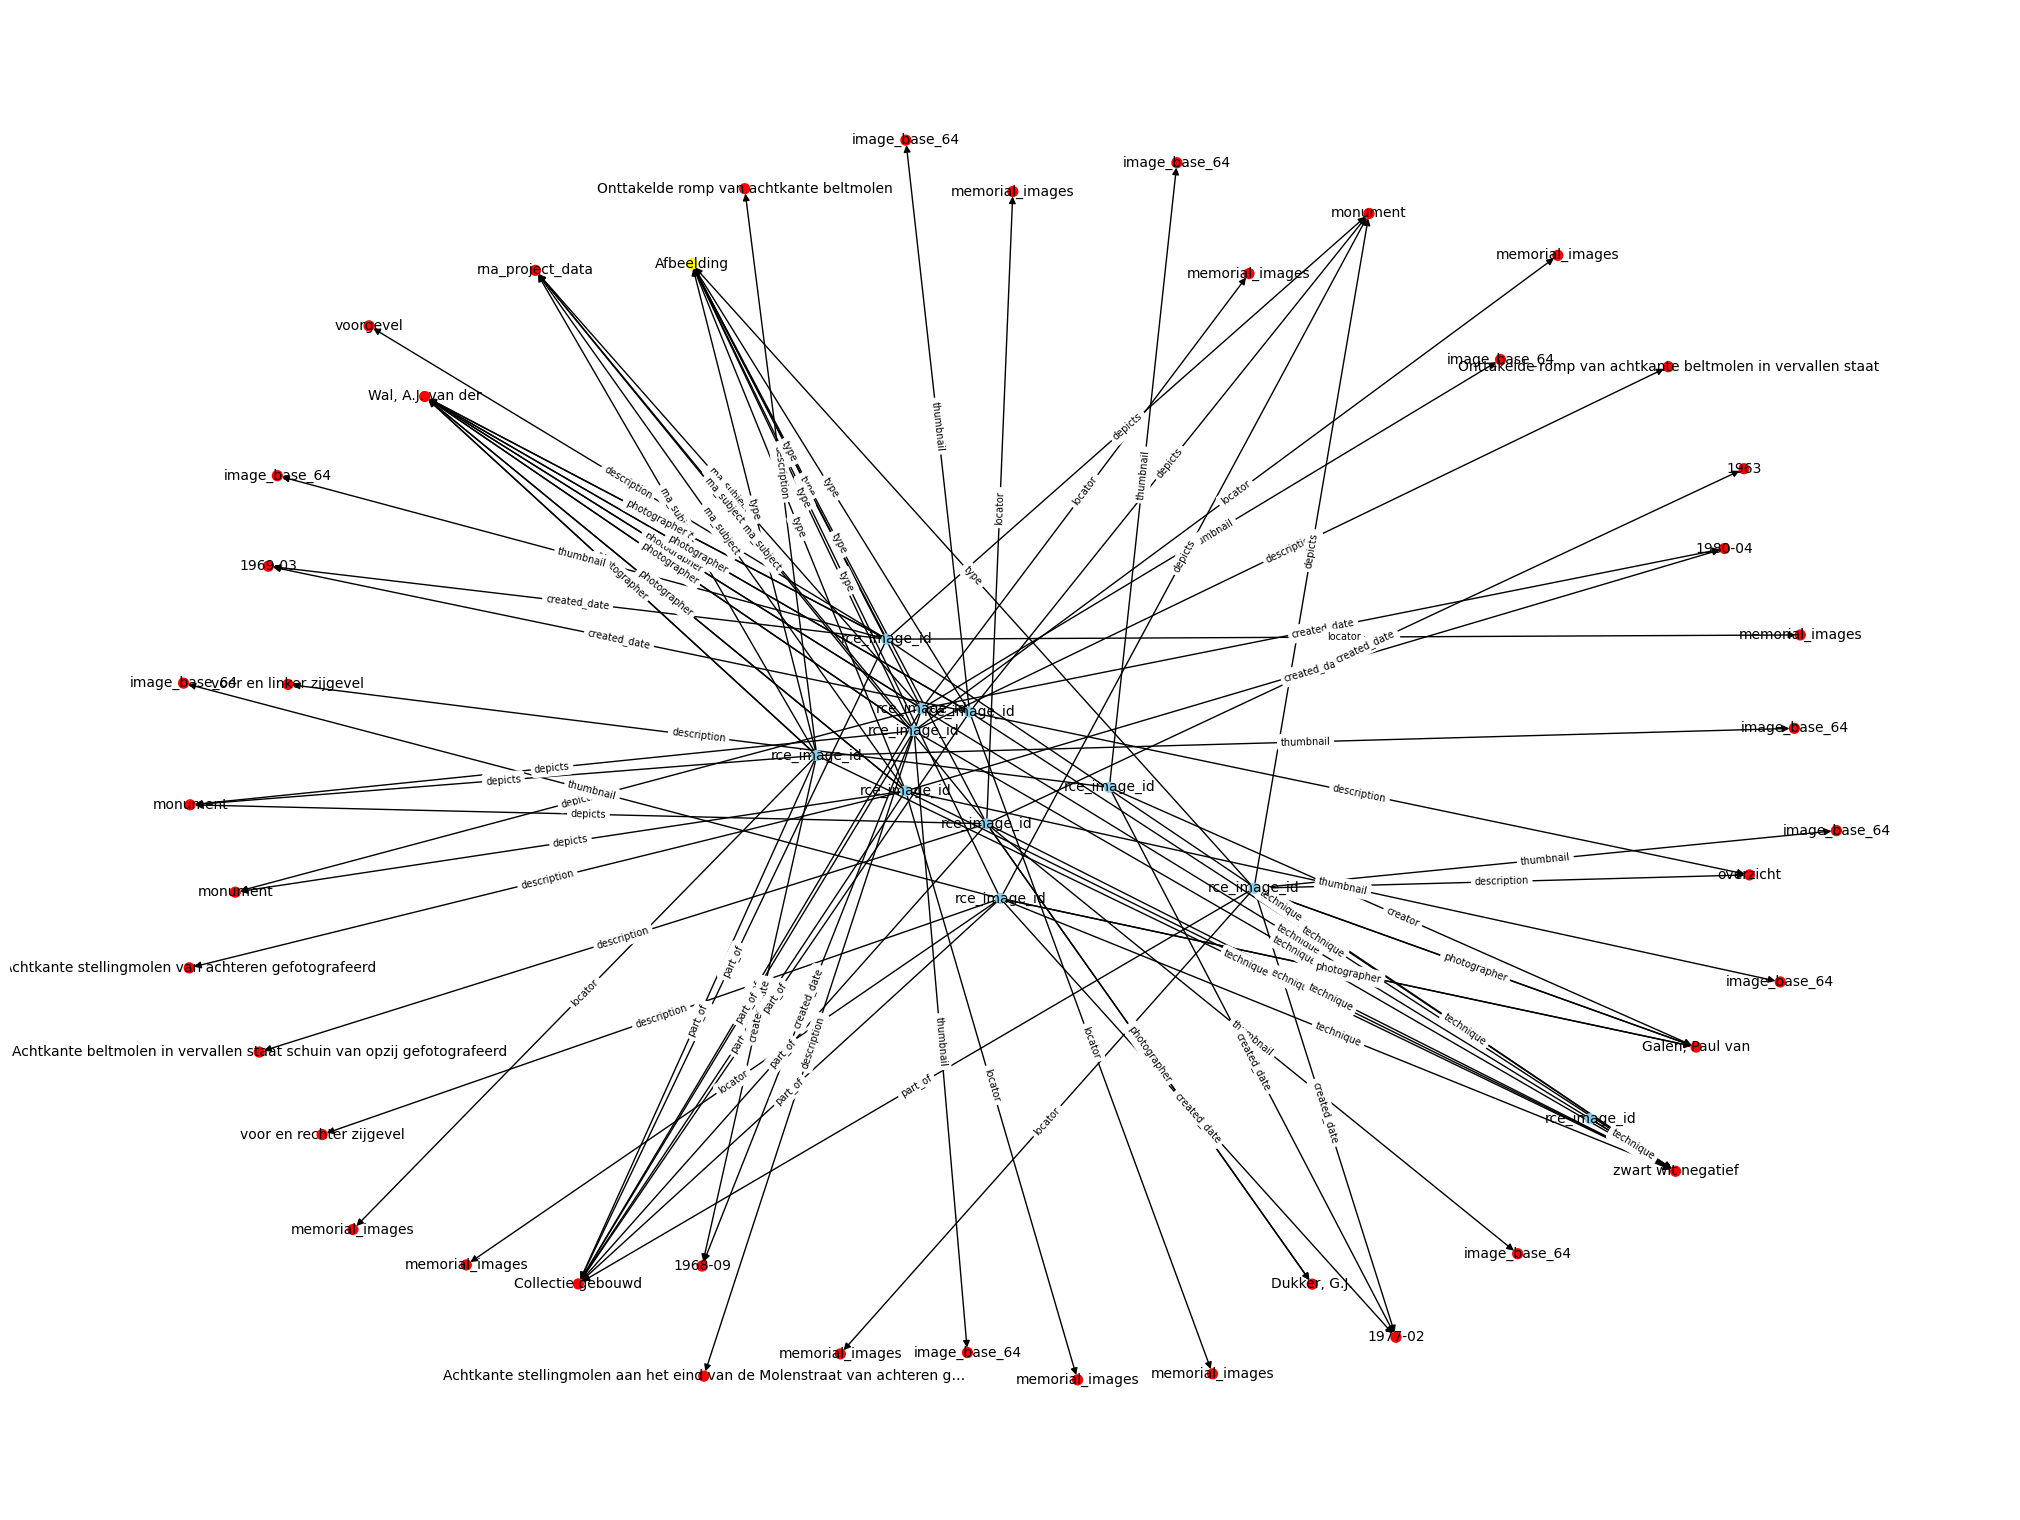

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import torch
import numpy as np
n = 1000  # Number of random triples you want to select
indices = torch.randperm(dataset.triples.size(0))[:n]

# Sample random triples from the tensor using these indices
random_triples = dataset.triples[211000:211100]
# Randomly select n triples from dataset

def shorten(name, length=70):
    """Ensure name is a string and shorten it intelligently."""
    if isinstance(name, tuple):

        url=name[0]
        for base_url, short_label in head_dict.items():
          if url.startswith(base_url):  # Check if URL starts with a known base URL
              return short_label  # Return the corresponding short label



        # If tuple contains 'POLYGON', extract and shorten the polygon description
        for part in name:
            if "POLYGON" in part:
                return "POLYGON(…)"
            if "POINT" in part:
              return "Point()" # Shortened for readability
            if 'http://kgbench.info/dt#base64Image' in  part:
              return "image_base_64"
            if 'wiki' in  part:
              return "image_base_64"

        # Default: Convert entire tuple to string if no specific pattern found
        name = name[0]
    if "http" in name :
      print(name)
    # Truncate if necessary
    return name[:length] + "…" if len(name) > length else name


# Create a MultiDiGraph where edges have labels (relations)
G = nx.MultiDiGraph()
for head, rel, tail in random_triples:
       # G.add_edge(dataset.i2e[head], dataset.i2e[tail], label=dataset.i2r[rel])
        G.add_edge(int(head),int(tail), label=dataset.i2r[rel])
# Set different colors for Head and Tail nodes
head_nodes = {int(head) for head, _, _ in random_triples}
tail_nodes = {int(tail) for _, _, tail in random_triples}

# Assign colors
node_colors = []
for node in G.nodes():
    if int(node)==211084:#to fidn degree for some reason its shown seperately
        print("Found")
        node_colors.append("yellow")
    elif  int(node) in head_nodes:
        node_colors.append("skyblue")  # Head nodes - Blue
    elif int(node) in tail_nodes:
        node_colors.append("red")  # Tail nodes - Red
    else:
        node_colors.append("red")  # Other nodes (if any)

# Draw a small subgraph for visualization
plt.figure(figsize=(20,15))
pos = nx.spring_layout(G, k=3/np.sqrt(n), scale=20)  # Increased k and scale for better spacing
nx.draw(G, pos, with_labels=False, node_size=50, font_size=8, node_color=node_colors)
edge_labels = {(u, v): relation_dict.get(d['label'],"unkown") for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)
node_labels = {node: shorten(dataset.i2e[node]) for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)
plt.show()


In [ ]:
# Print nodes with degree > 1 along with their mapped value from dataset.i2e
print("Nodes with Degree > 1:")

for node in G.nodes():
    degree = G.degree(node)
    if degree > 1:
        node_value = dataset.i2e[node ] # Handle missing mappings
        print(f"Node: {node}, Degree: {degree}, Mapped Value: {node_value}")


Nodes with Degree > 1:
Node: 341077, Degree: 10, Mapped Value: ('zwart wit negatief', '@nl-nl')
Node: 228653, Degree: 11, Mapped Value: ('https://data.labs.pdok.nl/rce/id/image/20215140', 'iri')
Node: 4328, Degree: 2, Mapped Value: ('1980-04', 'none')
Node: 79498, Degree: 12, Mapped Value: ('Wal, A.J. van der', 'none')
Node: 23569, Degree: 9, Mapped Value: ('Collectie gebouwd', '@nl-nl')
Node: 211084, Degree: 9, Mapped Value: ('https://data.labs.pdok.nl/rce/def/Afbeelding', 'iri')
Node: 283366, Degree: 2, Mapped Value: ('https://data.labs.pdok.nl/rce/id/monument/39032', 'iri')
Node: 201839, Degree: 5, Mapped Value: ('http://www.rnaproject.org/data/0d4bd09f-e7e6-44b1-8939-e6f65d3cf47a', 'http://www.w3.org/2001/XMLSchema#anyURI')
Node: 228654, Degree: 11, Mapped Value: ('https://data.labs.pdok.nl/rce/id/image/20215142', 'iri')
Node: 228656, Degree: 11, Mapped Value: ('https://data.labs.pdok.nl/rce/id/image/20215428', 'iri')
Node: 25943, Degree: 2, Mapped Value: ('Dukker, G.J.', 'none')
N

In [ ]:
for head, _, tail in random_triples:
    if int(head.item) == 211084 or int(tail) == 211084:
        print(f" head {head.item()} {(type(head))} and tail  {tail} ")


 head 228653 <class 'torch.Tensor'> and tail  211084 
 head 228654 <class 'torch.Tensor'> and tail  211084 
 head 228656 <class 'torch.Tensor'> and tail  211084 
 head 228657 <class 'torch.Tensor'> and tail  211084 
 head 228658 <class 'torch.Tensor'> and tail  211084 
 head 228659 <class 'torch.Tensor'> and tail  211084 
 head 228660 <class 'torch.Tensor'> and tail  211084 
 head 228661 <class 'torch.Tensor'> and tail  211084 
 head 228662 <class 'torch.Tensor'> and tail  211084 


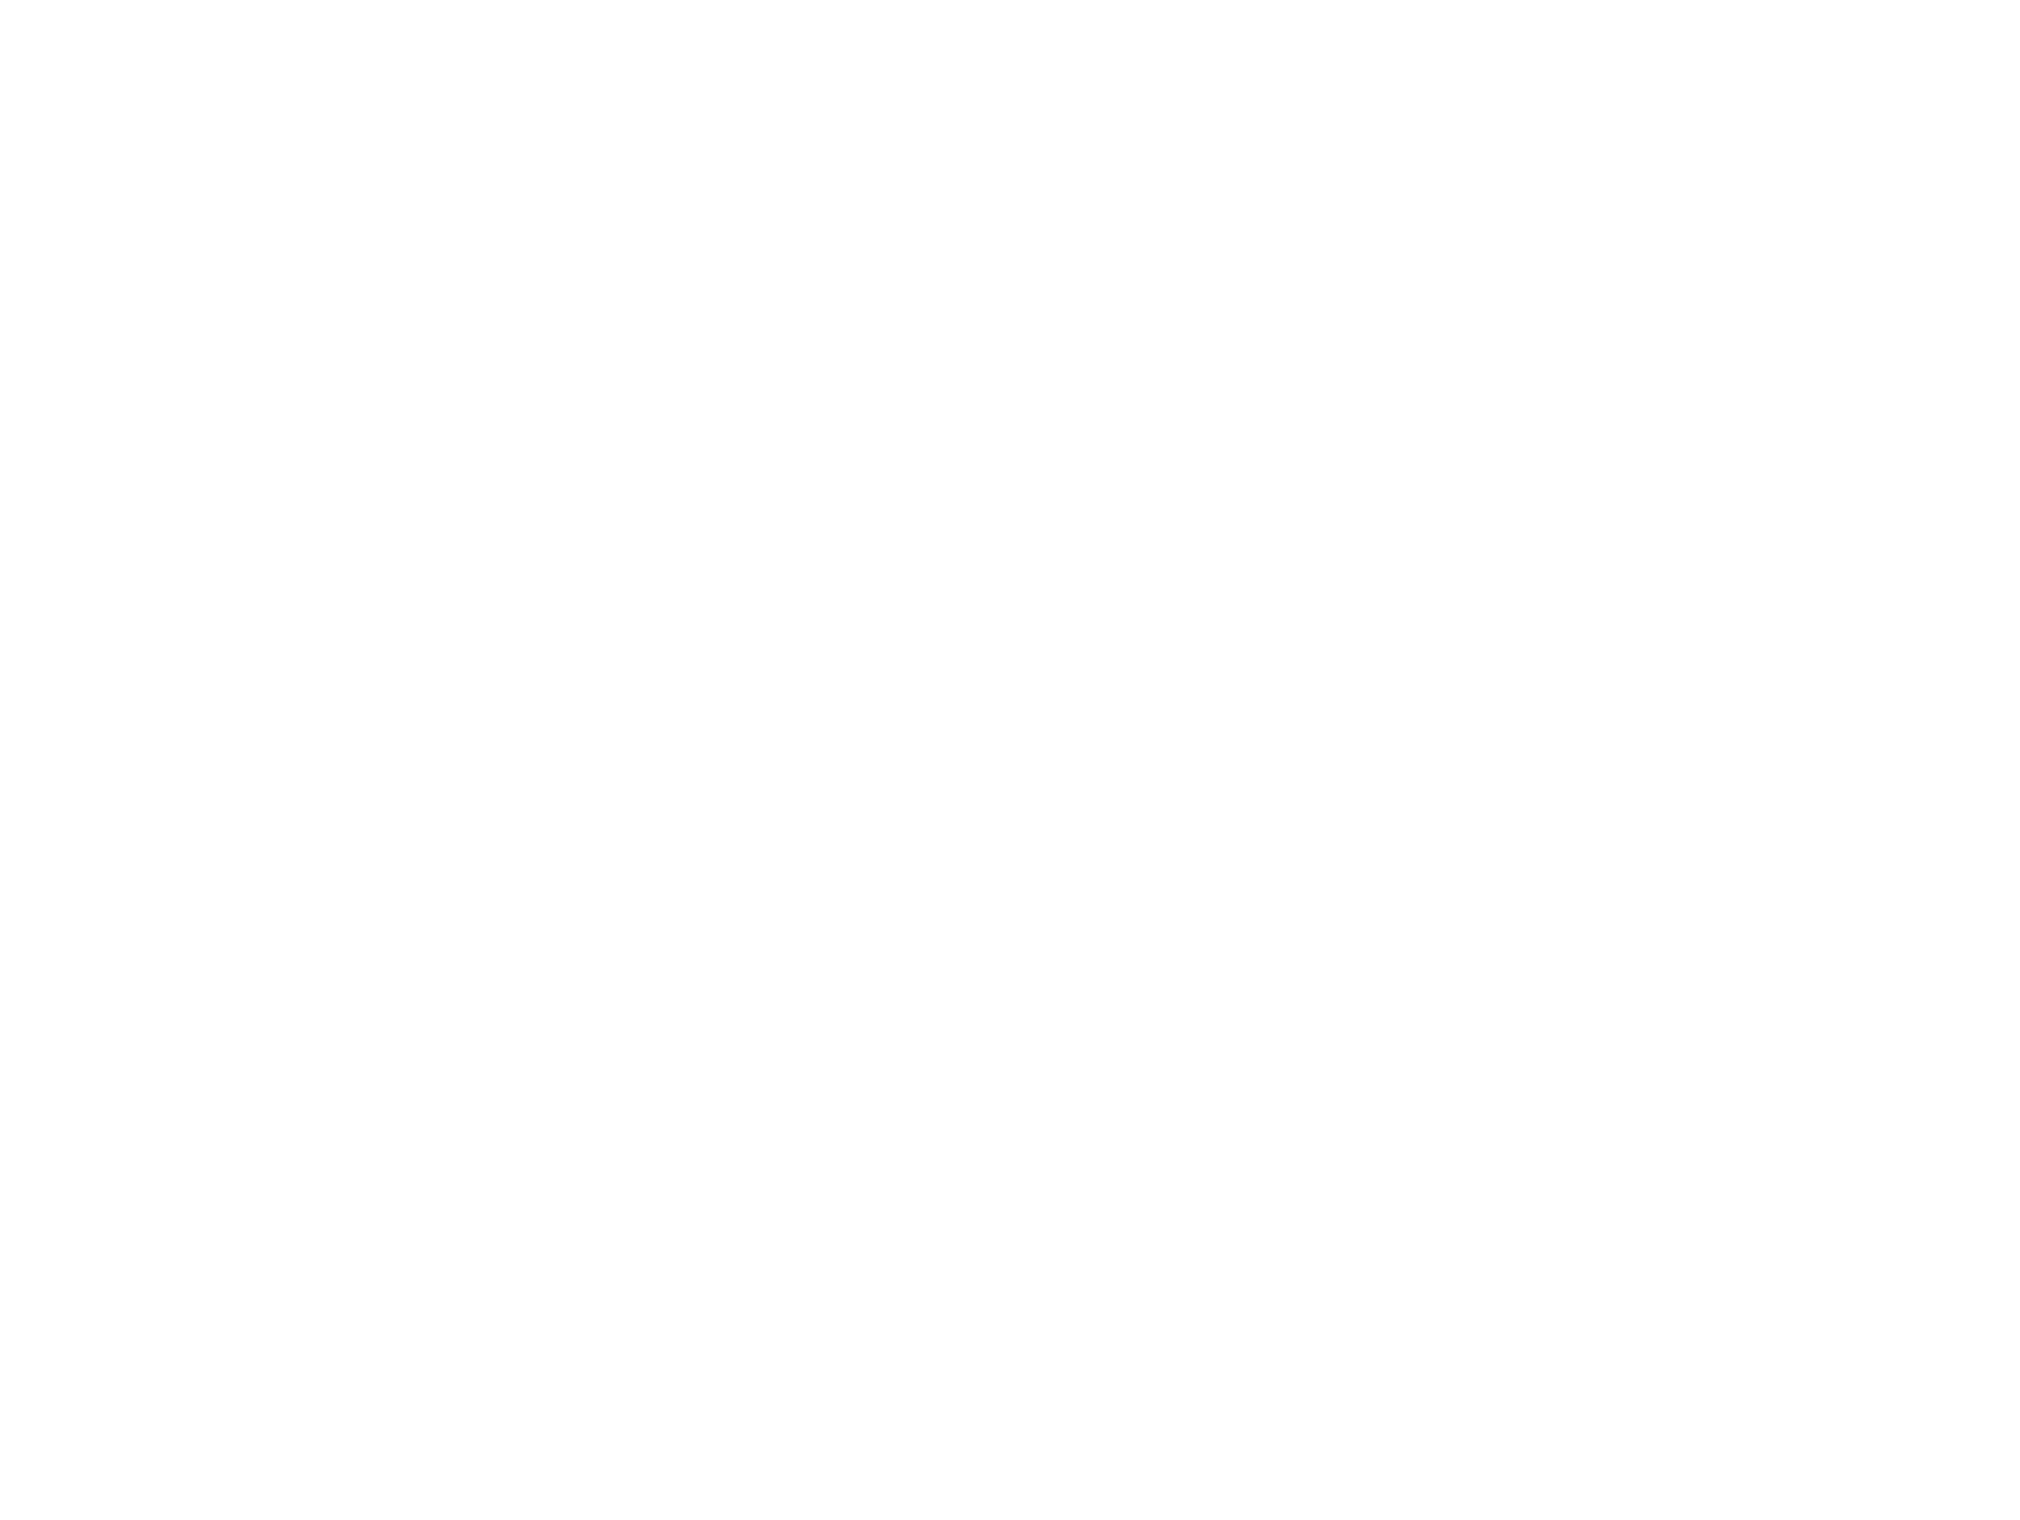

Original graph nodes: 2000, edges: 1000
Filtered graph nodes: 0, edges: 0


In [ ]:
node_degrees = dict(G.degree())  # Total degree (in-degree + out-degree)
filtered_nodes = {node for node, degree in node_degrees.items() if degree >= 2}  # Keep nodes with degree ≥ 2

# Create a subgraph with only the filtered nodes
G_filtered = G.subgraph(filtered_nodes).copy()

# Assign colors
node_colors = ["skyblue" if node in filtered_nodes else "red" for node in G_filtered.nodes()]

# Draw the filtered graph
plt.figure(figsize=(20, 15))
pos = nx.spring_layout(G_filtered, k=3/np.sqrt(n), scale=20)
nx.draw(G_filtered, pos, with_labels=False, node_size=50, font_size=8, node_color=node_colors)
edge_labels = {(u, v): relation_dict.get(d['label'], "unknown") for u, v, d in G_filtered.edges(data=True)}
nx.draw_networkx_edge_labels(G_filtered, pos, edge_labels=edge_labels, font_size=7)
node_labels = {node: shorten(dataset.i2e[node]) for node in G_filtered.nodes()}
nx.draw_networkx_labels(G_filtered, pos, labels=node_labels, font_size=10)
plt.show()

print(f"Original graph nodes: {G.number_of_nodes()}, edges: {G.number_of_edges()}")
print(f"Filtered graph nodes: {G_filtered.number_of_nodes()}, edges: {G_filtered.number_of_edges()}")

In [ ]:
import random

random_triples = random.sample(dataset.triples.tolist(), 70)  # Select 120 random triples
urls=[]
for head, rel, tail in random_triples:
    head_value = dataset.i2e[head]  # Get the actual head value
    tail_value = dataset.i2e[tail]
    urls.append(head_value)
    if "@nl-nl" == tail_value[1] or "none" == tail_value[1] :
      print(tail_value)


('Nieuwstraat', 'none')
('Achtkante stellingmolen in de winter schuin van opzij gefotografeerd achter loods', '@nl-nl')
('48', 'none')
('Dukker, G.J.', 'none')
('POLYGON ((156818.473816 462205.330627, 156820.317017 462208.863037, 156828.575989 462224.725037, 156829.343018 462226.197998, 156834.826416 462236.93103, 156841.749023 462250.481018, 156842.267029 462251.494019, 156842.653992 462252.252014, 156842.830994 462252.598022, 156843.065002 462253.057007, 156843.256042 462253.416992, 156848.653015 462263.56604, 156851.780029 462269.447021, 156864.97699 462294.621033, 156877.492004 462319.371033, 156884.718018 462333.69104, 156892.329041 462350.151001, 156906.833008 462382.445007, 156917.738037 462405.39801, 156923.145996 462416.807983, 156933.140015 462439.397034, 156940.122986 462455.796997, 156943.56604 462463.91803, 156948.246033 462474.288025, 156952.546021 462479.5, 156960.752991 462488.156006, 156973.467041 462501.379028, 156977.967041 462506.124023, 156979.606018 462504.697021,

In [ ]:
from urllib.parse import urlparse
filtered_urls = []
uniqueurl=set()
for head,_, _ in dataset.triples:
    url=dataset.i2e[head][0]
    parsed_url = urlparse(url)
    base_path = "/".join(parsed_url.path.strip('/').split('/')[:-1])  # Remove last segment
    new_url = f"{parsed_url.scheme}://{parsed_url.netloc}/{base_path}/"  # Reconstruct the URL
    uniqueurl.add(new_url)
    filtered_urls.append(new_url)
print(uniqueurl,len(uniqueurl))
# Print results
for url in filtered_urls:
    print(len(url))

{'http://sws.geonames.org/2744199/', 'http://sws.geonames.org/2756359/', 'http://sws.geonames.org/2755243/', 'http://sws.geonames.org/2745154/', 'http://sws.geonames.org/2749689/', 'http://sws.geonames.org/2746434/', 'http://sws.geonames.org/2744679/', 'http://sws.geonames.org/2747506/', 'http://sws.geonames.org/2748994/', 'http://sws.geonames.org/2757852/', 'http://sws.geonames.org/2746548/', 'http://sws.geonames.org/2750443/', 'http://sws.geonames.org/2751285/', 'http://sws.geonames.org/2757937/', 'http://sws.geonames.org/2744865/', 'http://sws.geonames.org/2755601/', 'http://sws.geonames.org/2746133/', 'http://sws.geonames.org/2751874/', 'http://sws.geonames.org/2753256/', 'http://sws.geonames.org/2743528/', 'http://sws.geonames.org/2756572/', 'http://sws.geonames.org/2754922/', 'http://sws.geonames.org/2744248/', 'http://sws.geonames.org/2747210/', 'http://sws.geonames.org/2749461/', 'http://sws.geonames.org/2747242/', 'http://sws.geonames.org/2749234/', 'http://sws.geonames.org/27

finding unqire heads

In [ ]:
import random
from urllib.parse import urlparse
from tqdm import tqdm

unique_urls = set()

for head, rel, tail in tqdm(dataset.triples, desc="Processing triples"):
        head_value = dataset.i2e[head]  # Get the actual head value
        if not isinstance(head_value, (list, tuple)):  # Ensure it's iterable
            print(f"Unexpected head_value: {head_value}")
            continue

        parsed_url = urlparse(head_value[0])
        base_path = "/".join(parsed_url.path.strip('/').split('/')[:-1])  # Remove last segment
        new_url = f"{parsed_url.scheme}://{parsed_url.netloc}/{base_path}/"  # Reconstruct the URL
        unique_urls.add(new_url)




# Save unique URLs to a text file
output_file = "unique_urls.txt"
with open(output_file, "w") as f:
    for url in unique_urls:
        f.write(url + "\n")

print(f"Total unique base URLs: {len(unique_urls)}")



Processing triples: 100%|██████████| 777124/777124 [00:14<00:00, 54190.27it/s]

Total unique base URLs: 3200


In [ ]:
unique_urls2 = {url for url in unique_urls if ".geonames.org" not in url and "wiki" not in url }
unique_urls2.add("http://sws.geonames.org/")
unique_urls2.add("http://www.geonames.org/")
unique_urls2.add("http://wikipedia.org/")

# Print the cleaned set
print(len(unique_urls2),(unique_urls2))

18 {'https://data.labs.pdok.nl/.well-known/genid/', 'https://data.pldn.nl/cbs/wijken-buurten/regios/2016/id/land-geografisch/', 'https://data.pldn.nl/cbs/wijken-buurten/def/', 'https://images.memorix.nl/rce/download/fullsize/', 'http://www.opengis.net/ont/', 'http://sws.geonames.org/', 'http://data.cultureelerfgoed.nl/semnet/', 'http://www.geonames.org/', 'http://www.rnaproject.org/data/', 'https://data.labs.pdok.nl/cbs/id/gemeente/', 'https://data.pldn.nl/cbs/wijken-buurten/regios/2016/id/geometry/', 'http://dbpedia.org/resource/', 'https://data.labs.pdok.nl/rce/id/image/', ':////', 'https://data.labs.pdok.nl/rce/def/', 'http://wikipedia.org/', 'http://bag.basisregistraties.overheid.nl/bag/id/geometry/', 'https://data.labs.pdok.nl/rce/id/monument/'}


In [ ]:
import requests
from rdflib import Graph

geonames_id = "2755348"
rdf_url = f"http://sws.geonames.org/{geonames_id}/about.rdf"

g = Graph()
g.parse(rdf_url)

for s, p, o in g:
    print(s, p, o)


https://sws.geonames.org/2755348/ http://www.w3.org/2003/01/geo/wgs84_pos#long 6.12083
https://sws.geonames.org/2755348/about.rdf http://creativecommons.org/ns#attributionName GeoNames
https://sws.geonames.org/2755348/ http://www.geonames.org/ontology#parentADM2 https://sws.geonames.org/6544256/
https://sws.geonames.org/2755348/ http://www.geonames.org/ontology#nearbyFeatures https://sws.geonames.org/2755348/nearby.rdf
https://sws.geonames.org/2755348/ http://www.geonames.org/ontology#locationMap https://www.geonames.org/2755348/greffelkamp.html
https://sws.geonames.org/2755348/about.rdf http://purl.org/dc/terms/modified 2007-06-03
https://sws.geonames.org/2755348/ http://www.w3.org/2003/01/geo/wgs84_pos#lat 51.9525
https://sws.geonames.org/2755348/ http://www.geonames.org/ontology#countryCode NL
https://sws.geonames.org/2755348/about.rdf http://creativecommons.org/ns#license https://creativecommons.org/licenses/by/4.0/
https://sws.geonames.org/2755348/about.rdf http://www.w3.org/1999/

unique tails

In [ ]:
import random
from urllib.parse import urlparse
from tqdm import tqdm

tails=[]
for head, rel, tail in tqdm(dataset.triples, desc="Processing triples"):
        tail_value = dataset.i2e[tail]  # Get the actual head value
        tails.append(tail_value)




# Save unique URLs to a text file
output_file = "tails .txt"
with open(output_file, "w") as f:
    for tail in tails:
        f.write(tail[0] + "\n")

print(f"Total tails: {len(tails)}")



In [ ]:
# Save unique URLs to a text file
output_file = "tails .txt"
with open(output_file, "w") as f:
    for tail in tails:
        f.write(tail[0] + "\n")

print(f"Total tails: {len(tails)}")


Total tails: 777124


In [ ]:
torch.version.cuda

'12.4'

In [ ]:

!pip install -q torch-geometric
!pip install open_clip_torch
!pip install shapely # For handling geometry
!pip install PILLOW

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00


In [ ]:
import torch
import open_clip
from shapely.wkt import loads as load_wkt
from PIL import Image
import io
import base64
import numpy as np

# Load CLIP model
model ,preprocess_train,preprocess_val = open_clip.create_model_and_transforms("ViT-B-32", pretrained="openai")
tokenizer = open_clip.get_tokenizer("ViT-B-32")

device = "cuda" if torch.cuda.is_available() else "cpu"
model=model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


open_clip_model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/open_clip/factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


In [ ]:
 correct  for new vesio nimport torch
import open_clip
from shapely.wkt import loads as load_wkt
from PIL import Image
import io
import base64
import numpy as np

# Load CLIP model
model, preprocess = open_clip.create_model_and_transforms("ViT-B-32", pretrained="openai")
tokenizer = open_clip.get_tokenizer("ViT-B-32")

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)


SyntaxError: invalid syntax (<ipython-input-5-20dcd323879b>, line 1)

In [ ]:
import torch
import open_clip
import base64  # Import base64 for decoding
from shapely.wkt import loads as load_wkt
from PIL import Image
import io
import numpy as np
import os
import psutil
import gc

def get_clip_embedding(triple, dataset, model, tokenizer, preprocess, device):
    head, relation, tail = triple  # Extract entity, relation, and value

    # Convert head and tail using i2e (entity list)
    head_text = dataset.i2e[head][0]
    relation_text = dataset.i2r[relation][0]
    tail_text = dataset.i2e[tail][0]

    # Handle different types of values
    if isinstance(tail_text, str):
        # Check if it's a URL, spatial data (WKT), or plain text
        if tail_text.startswith("http") or tail_text.startswith("www"):
            tail_text = f"URL: {tail_text}"
        elif tail_text.startswith("POLYGON") or tail_text.startswith("POINT"):
            geom = load_wkt(tail_text)  # Convert WKT to geometry
            tail_text = f"Geometry: {geom.wkt}"  # Convert back to text
        elif tail_text.startswith("jqwbwihbafohusbfnq"):  # Image handling
            print(len(tail_text))  # Debugging output

            try:
                if isinstance(tail_text, str):
                    # Check if it's a Base64-encoded string and decode it
                    image_bytes = base64.b64decode(tail_text)
                else:
                    image_bytes = tail_text  # If already in bytes, use as is

                # Convert bytes to image
                image = Image.open(io.BytesIO(image_bytes)).convert("RGB")
                image_tensor = preprocess(image).unsqueeze(0).to(device)

                with torch.no_grad():
                    embedding = model.encode_image(image_tensor).cpu().numpy()
                return embedding

            except Exception as e:
                print(f"Error processing image: {e}")
                return np.zeros((1, 512))  # Return a dummy vector on failure

        # Tokenize and encode text
        text_input = f"Entity: {head_text}, Relation: {relation_text}, Value: {tail_text}"
        tokenized = tokenizer([text_input]).to(device)

        with torch.no_grad():
            embedding = model.encode_text(tokenized).cpu().numpy()

    else:
        # If tail type is unknown
        embedding = np.zeros((1, 512))  # Dummy zero vector for unknown types

    return embedding

# Function to check RAM usage
def check_memory_limit(threshold=80):
    """Stops execution if RAM usage exceeds threshold (default 80%)."""
    mem = psutil.virtual_memory()
    ram_used = mem.percent
    if ram_used > threshold:
        print(f"🚨 High RAM usage detected: {ram_used}%! Stopping execution.")
        return True  # Return True to indicate high memory usage
    return False


In [ ]:
triple = dataset.triples[4552]  # Assuming dataset.triples is a tensor

# Extract head, relation, and tail indices
head_idx, relation_idx, tail_idx = triple.tolist()

# Retrieve the actual values from i2e and i2r
head_text = dataset.i2e[head_idx]  # Get the entity name
relation_text = dataset.i2r[relation_idx]  # Get the relation name
tail_text = dataset.i2e[tail_idx]  # Get the tail entity name

# Print results
print(f"Head: {head_text}")
print(f"Relation: {relation_text}")
print(f"Tail: {tail_text}")

In [ ]:
import numpy as np
import os
import random
import gc
from tqdm import tqdm  # Import tqdm for progress bar

# Batch Processing Settings
batch_size = 512
sampling_percentage = 0.2  # 20% of the dataset
checkpoint_file = "clip_embeddings.npy"

# Randomly select 20% of the dataset
num_triples = len(dataset.triples)
num_samples = int(num_triples * sampling_percentage)
sampled_triples = random.sample(dataset.triples.tolist(), num_samples)  # Random selection

print(f"Selected {num_samples}/{num_triples} triples for processing.")

embedding_list = []
save_every = 10000  # Save progress every 10,000 triples

# Resume from checkpoint (if exists)
if os.path.exists(checkpoint_file):
    print("Resuming from previous checkpoint...")
    embedding_list = np.load(checkpoint_file, allow_pickle=True).tolist()

start_index = len(embedding_list)
print(f"Starting from triple {start_index}/{num_samples}")

# Process in Batches with tqdm progress bar
for i in tqdm(range(start_index, num_samples, batch_size), desc="Processing triples"):
    batch = sampled_triples[i: i + batch_size]
    batch_embeddings = []

    for triple in batch:
        embedding = get_clip_embedding(triple, dataset, model, tokenizer, preprocess_val, device)
        batch_embeddings.append(embedding)

        # Check if memory is exceeding safe limits
        if check_memory_limit(threshold=85):
            print("⚠️ Stopping early to prevent Colab crash.")
            break  # Exit loop early before crashing

    embedding_list.extend(batch_embeddings)

    # Save progress every 10,000 triples
    if (i + batch_size) % save_every == 0 or check_memory_limit(threshold=85):
        np.save(checkpoint_file, np.array(embedding_list))
        print(f"✅ Saved checkpoint at {i + batch_size} triples.")
        gc.collect()  # Free up memory

# Final save
np.save(checkpoint_file, np.array(embedding_list))
print(f"🎉 Completed embedding generation. Saved as '{checkpoint_file}'.")


Selected 155424/777124 triples for processing.
Starting from triple 0/155424


Processing triples:   0%|          | 1/304 [01:41<8:34:10, 101.82s/it]


KeyboardInterrupt: 

In [ ]:
emebeddinglist[1]

In [ ]:
len( dataset.triples)

777124